In [5]:
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from cycler import cycler

ls_cycler = cycler('linestyle', ['solid', 'dashed', 'dotted', 'dashdot', (0, (3, 1, 1, 1, 1, 1))])
clr_cycler = cycler('color', ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange'])
plt.rc('axes', prop_cycle=ls_cycler+clr_cycler)

In [ ]:
def savepdf_tex(fig, name, **kwargs):
    import subprocess, os
    fig.savefig("temp.svg", format="svg", **kwargs)
    incmd = ["inkscape", "temp.svg", "--export-pdf={}.pdf".format(name),
             "--export-latex"] #"--export-ignore-filters",
    subprocess.check_output(incmd)
    os.remove("temp.pdf")

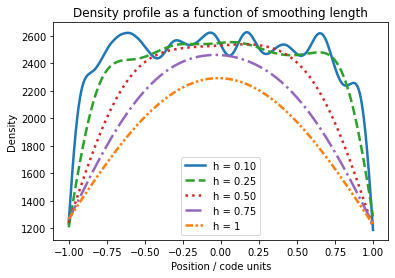

In [6]:
density_files = glob.glob("../data/densities*.txt")
density_files = sorted(density_files)
for d in density_files:
    data = np.loadtxt(d)
    # Sort by position
    data = data[data[:,0].argsort()]
    # Normalize
    #data[:,1] /= max(data[:,1])

    plt.plot(data[:,0], data[:,1], label=f"h = {d[18:-4].replace('p','.')}", linewidth=2.5)

plt.xlabel("Position / code units")
plt.ylabel("Density")

plt.title("Density profile as a function of smoothing length")

plt.legend()
plt.show()
savepdf_tex(plt.gcf(), "density_h")


In [7]:
def exp_fit(x, a, b):
    return a * np.power(x, b)

def log_fit(x, a, b):
    return a * x*np.log(x) + b

/tmp/ipykernel_108624/2815663466.py:2: RuntimeWarning: overflow encountered in power
  return a * np.power(x, b)
/tmp/ipykernel_108624/2815663466.py:2: RuntimeWarning: overflow encountered in multiply
  return a * np.power(x, b)


[1.53746411e-05 2.65883976e+00]


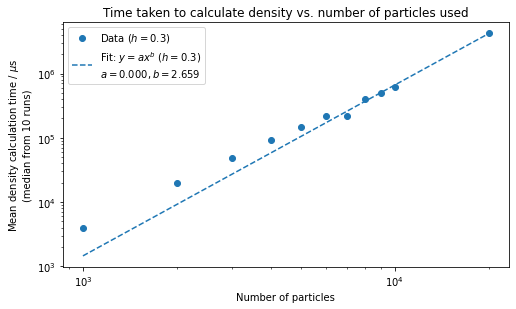

In [8]:
plt.figure(figsize=(8, 4.5))
# Read in text file and calculate average time
for h in ["0p3"]:
    hdisp = h.replace('p', '.')
    if h == 1: hdisp = "0.99"
    x = []
    y = []
    profile_files = glob.glob(f"../data/{h}_profiling_*.txt")

    for p in profile_files:
        # Grab particle count from filename
        n_part = int(re.findall('\d+(?=part.txt)', p)[0])
        data = np.loadtxt(p)
        avg = np.mean(data)
        x.append(n_part)
        y.append(avg)

    plt.scatter(x, y, label=f"Data ($h={hdisp}$)")
    popt, pcov = scipy.optimize.curve_fit(exp_fit, x, y)
    print(popt)
    x = sorted(x)
    plt.plot(x, exp_fit(x, popt[0], popt[1]), linestyle='dashed', label=f"Fit: $y = ax^b$ ($h={hdisp}$)\n$a={popt[0]:.3f}, b={popt[1]:.3f}$")


ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Number of particles")
ax.set_ylabel("Mean density calculation time / $\mu$s\n(median from 10 runs)")
plt.title("Time taken to calculate density vs. number of particles used")
plt.legend()
plt.show()

## TODO: Profile the code on my desktop computer, because I have no idea why the speed keeps changing, it's probably due to power settings on my laptop